In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
import seaborn as sns

%matplotlib inline

In [2]:
dataset = pd.read_csv('etl_data.csv')

In [3]:
dataset.head()

,loan_limit,pre_approval,loan_type,loan_purpose,line_of_credit,commercial_loan,loan_amount,interest_rate,interest_rate_spread,upfront_charges,...,units,income,credit_type,credit_score,co_borrower_credit_type,application_taken,ltv,deposit_type,status,dti
0,1,0,1,1,0,0,116500,4.3125,0.0000,0.0,...,1,1740.0,1,758,4,1,98.728814,1,1,45.000000
1,1,0,2,1,0,1,206500,4.3125,0.0000,0.0,...,1,4980.0,2,552,1,1,79.362416,1,1,37.369267
2,1,1,1,1,0,0,406500,4.5600,0.2000,595.0,...,1,9480.0,1,834,4,1,80.019685,1,0,46.000000
3,1,0,1,4,0,0,456500,4.2500,0.6810,0.0,...,1,11880.0,1,587,4,2,69.376900,1,0,42.000000
4,1,1,1,1,0,0,696500,4.0000,0.3042,0.0,...,1,10440.0,4,602,1,2,91.886544,1,0,39.000000


#### Loan Limits

In [17]:
conforming_limit_non_performing = dataset[(dataset['loan_limit'] == 1) & (dataset['status'] == 1)]['loan_limit'].count()
conforming_limit_performing = dataset[(dataset['loan_limit'] == 1) & (dataset['status'] == 0)]['loan_limit'].count()
non_conforming_limit_non_performing = dataset[(dataset['loan_limit'] == 2) & (dataset['status'] == 1)]['loan_limit'].count()
non_conforming_limit_performing = dataset[(dataset['loan_limit'] == 2) & (dataset['status'] == 0)]['loan_limit'].count()

conforming_limit_performing, conforming_limit_non_performing, non_conforming_limit_performing, non_conforming_limit_non_performing

(102904, 32444, 6664, 3314)

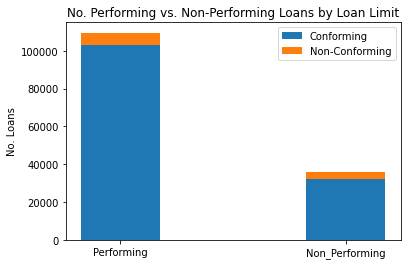

In [19]:
labels = ['Performing', 'Non_Performing']
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, [conforming_limit_performing, conforming_limit_non_performing], width, label='Conforming')
ax.bar(labels, [non_conforming_limit_performing, non_conforming_limit_non_performing], width, bottom=[conforming_limit_performing, conforming_limit_non_performing], label='Non-Conforming')

ax.set_ylabel('No. Loans')
ax.set_title('No. Performing vs. Non-Performing Loans by Loan Limit')
ax.legend()

plt.show()

### Loan amount

In [27]:
performing_loan_amounts = dataset[dataset['status'] == 1][['loan_amount']]
non_performing_loan_amounts = dataset[dataset['status'] == 0][['loan_amount']]

performing_loan_amounts, non_performing_loan_amounts

(        loan_amount
 0            116500
 1            206500
 10           136500
 12           206500
 15            76500
 ...             ...
 148651       446500
 148652        96500
 148658       386500
 148661       346500
 148663       106500
 
 [36639 rows x 1 columns],
         loan_amount
 2            406500
 3            456500
 4            696500
 5            706500
 6            346500
 ...             ...
 148665       436500
 148666       586500
 148667       446500
 148668       196500
 148669       406500
 
 [112031 rows x 1 columns])

In [38]:
performing_loan_amounts.groupby(by=['loan_amount'], as_index=False).size()['size']

0        3
1       15
2       64
3      102
4      344
      ... 
196      1
197      1
198      2
199      1
200      1
Name: size, Length: 201, dtype: int64

ValueError: x and y must have same first dimension, but have shapes (36639, 1) and (201,)

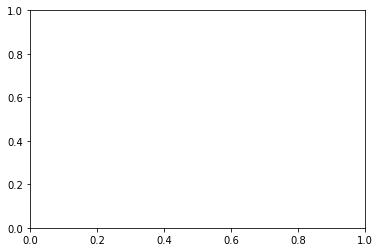

In [35]:
# plot lines
plt.plot(performing_loan_amounts, performing_loan_amounts.groupby(by=['loan_amount']).size(), label = "performing")
# plt.plot(non_performing_loan_amounts, label = "non-performing")
plt.legend()
plt.show()